Heres is the link for the colab: https://colab.research.google.com/drive/160gGCXabLH1Jjok-4q3342b3Y6B6lPrh


# Importing

In [0]:
#Importing packages, and setting style for seaborn plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
#Reading csv file
df_poke=pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/pokemon.csv')

In [3]:
#Checkings the first observations of the data fram to get a sense for the data
df_poke.head()

,Number,Name,Type1,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


In [4]:
#Further detailed information about the features of the data
pd.DataFrame(df_poke).describe()

,Number,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# 1a. Execute a PCA analysis on all numerical variables in the dataset.
Hint: Don't forget to scale them before. Use 4 components. What is the cumulative explained variance ratio?

In [0]:
#Importing PCA, and calling it with 4 components and saving it to 'pca' for easy use later
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [0]:
#Importing Scaler to scale the data to insure, that one feature doesn't out weight the others based on it having much higher numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
#Use the fit_transform method, to scale the data, and transform into as useble dataset
scaled_data = scaler.fit_transform(df_poke.loc[:,'HitPoints':'Speed'])

In [0]:
#Use the fit_transform method, to run our pca on the scaled data and transform it into a useble array
poke_pca = pca.fit_transform(scaled_data)

In [0]:
#Since .tranform changes into an array, we need to compute a name/group for the rows of the array
p_features = range(pca.n_components_)

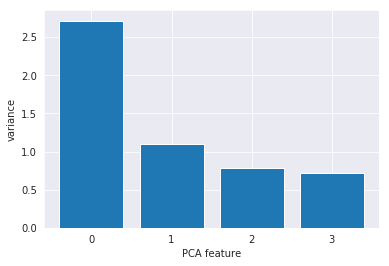

In [10]:
#I use a bar chart to map the features to at bar chart with the amount of the total variance they explain
plt.bar(p_features, pca.explained_variance_)
plt.xticks(p_features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()


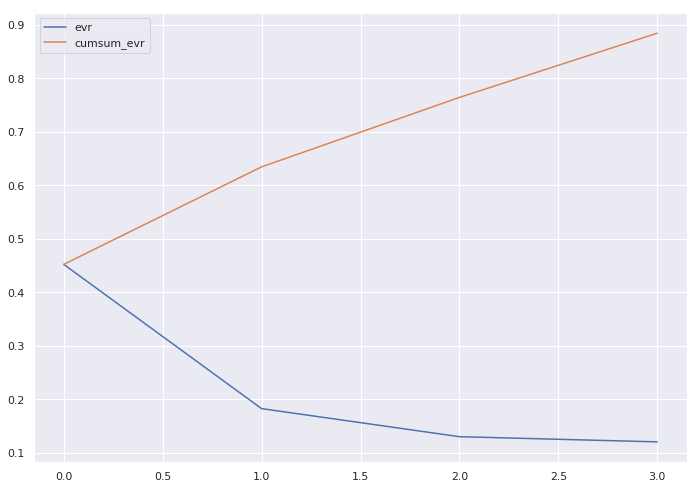

In [11]:
#Create a chat which also inludes the cumulative explained variance. 
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

# 1b. Perform a cluster analysis on all numerical variables (scaled & before PCA). 
Apply the elbow method todetermine a “pragmatic” number of clusters.

In [0]:
#Import and save KMeans to use for clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans()

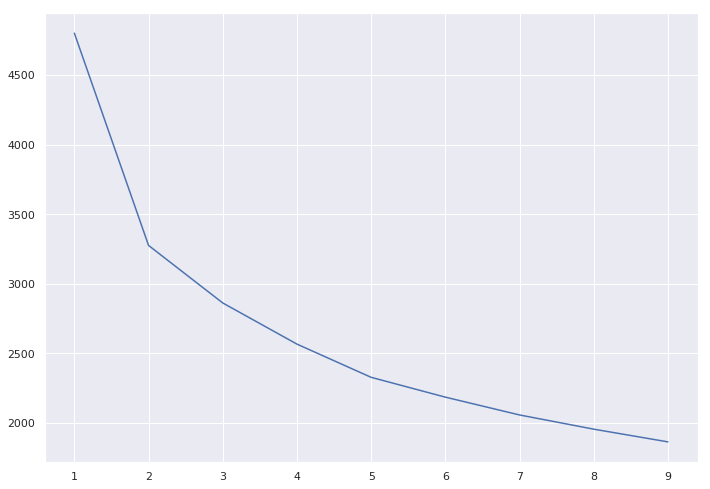

In [13]:
# Create a list inertia and a loop which fills out the list with  the .append function
# Then I map the inertia
inertia = []
for i in range(1,10):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(scaled_data).inertia_)

sns.lineplot(y = inertia, x = range(1,10))

# 1.c Visualize the first 2 principal components and color the datapoints by cluster.

In [14]:
# I juse KMeans with 5 clusters since the the first five clusters the variance inertia seams to fall-off
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit_transform(poke_pca)
# I creatte a new label using the predict function so that it fits i can categorize all the pokemon into these 5 clusters
new_labels = kmeans_5.predict(poke_pca)
df_poke['clusters']=new_labels
# Then I run a groupby and take the mean of the clusters, so that I can get a good look at their characteristics
df_poke.groupby('clusters').mean()

,Number,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
clusters,,,,,,,,,
0,343.990196,68.058824,82.220588,66.411765,80.750000,73.220588,89.892157,3.245098,0.000000
1,386.826923,65.192308,87.971154,123.326923,68.625000,92.759615,53.028846,3.442308,0.057692
2,350.517857,50.121429,53.814286,51.853571,47.978571,49.171429,49.121429,3.314286,0.000000
3,405.258929,90.142857,118.303571,93.776786,120.660714,99.633929,101.508929,3.383929,0.526786
4,363.130000,106.130000,89.610000,76.780000,76.980000,80.110000,56.460000,3.320000,0.000000


Clueter 0 is characterized by low stats an all features and 0 legendary pokemon

Clueter 1 is characterized by higest hitpoints and 0 legendary pokemon

Cluster 2 is characterized by high Defence and high special defence

Cluster 3 is characterized by high stats in general and a high likelyhood of a pokemon being legendary

Cluster 4 is characterized by high speed but and 0 legandary pokemon

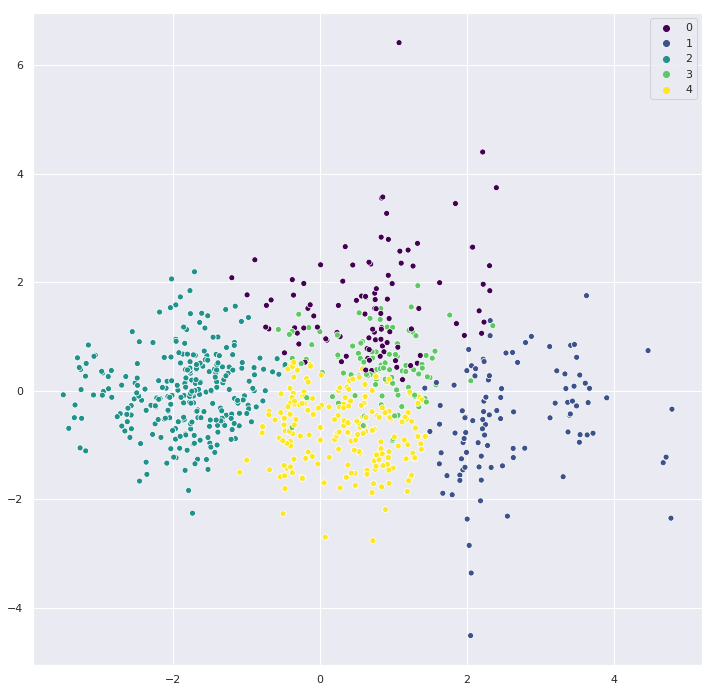

In [15]:
#I plot the clusters with the help of a scatter plot
kmeans_5.fit(poke_pca)
plt.figure(figsize=(12,12))
g = sns.scatterplot(poke_pca[:,0], poke_pca[:,1], hue=kmeans_5.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()

# 1.D Inspect the distribution of the variable “Type1” across clusters.
Does the algorithm separate the different types of pokemon?

In [16]:
# Using the cluster it is possible to create a crosstab to show which pokemon types are described by which characteristics.
# The normalized makes its so that each observation as a percentage of a row which falls into the group
cs_poke = pd.crosstab(index=df_poke['Type1'],columns=df_poke['clusters'],normalize='index')
print(cs_poke)

clusters         0         1         2         3         4
Type1                                                     
Bug       0.333333  0.188406  0.434783  0.043478  0.000000
Dark      0.290323  0.129032  0.322581  0.161290  0.096774
Dragon    0.187500  0.062500  0.156250  0.593750  0.000000
Electric  0.409091  0.136364  0.272727  0.136364  0.045455
Fairy     0.058824  0.058824  0.470588  0.176471  0.235294
Fighting  0.296296  0.074074  0.333333  0.037037  0.259259
Fire      0.403846  0.057692  0.250000  0.192308  0.096154
Flying    0.250000  0.000000  0.250000  0.500000  0.000000
Ghost     0.187500  0.250000  0.375000  0.125000  0.062500
Grass     0.300000  0.085714  0.371429  0.085714  0.157143
Ground    0.062500  0.187500  0.406250  0.125000  0.218750
Ice       0.250000  0.125000  0.333333  0.083333  0.208333
Normal    0.275510  0.020408  0.438776  0.081633  0.183673
Poison    0.285714  0.071429  0.500000  0.000000  0.142857
Psychic   0.228070  0.052632  0.315789  0.298246  0.1052

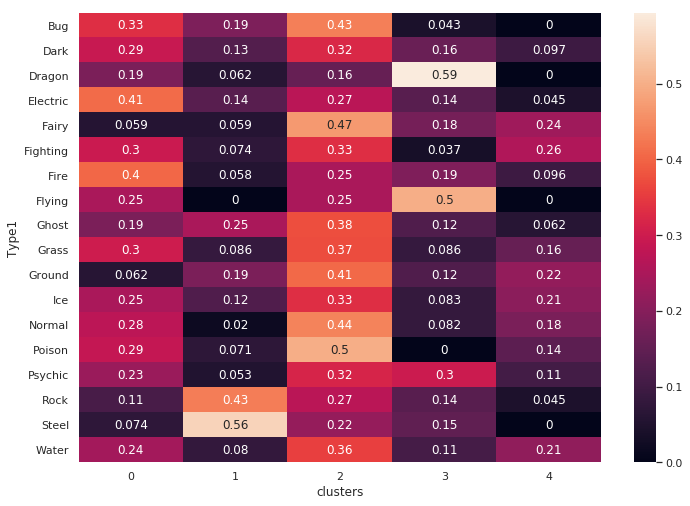

In [17]:
#Using a heatmap it becomes more clear, how each type fits into each cluster.
sns.heatmap(cs_poke, annot=True)


For example, poisen pokemon have almost no legendary pokemons as only clust 2 and 3 have a chance of having legendary pokemon, while Dragon pokemon have a high chance of being legendary.

# Supervised ML 
Your task will be to predict the variable “legendary”, indicating if the pokemon is a
legendary one or not.

# 2.a Perform necessary ML preprocessing of your data if deemed necessary


There is no need for pre-processing, since our y data is already a boolean type. If we were trying to predict type then we would have to use LabelEncoder() to recode they types into indicies

In [0]:
# Here i scale create a dateframe of the varibles i want to use to predict whether a pokemon is legendary. I chose not to incluede generation.
# I then scale the data
X = df_poke.loc[:,'HitPoints':'Speed']
X_scaled = scaler.fit_transform(X)
y = df_poke.Legendary

# 2.b Split the data in a training (75%) and test (25%) dataset


In [0]:
# I import 'train_test_slit' to randomly split my data into my test and training data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

# 2.c Define a n-fold cross-validation workflow for your model testing.

In 2.d I will use the cross_val_score score to validate the models, to test for overfitting. It wil be done in 2.d since 2.d introduces three separate models which need testing.

The code with be be written like the following;

cross_val_score(model, X_train, y_train, cv = 4)

Here the arrgument model will be replaced with the appropritate model.

The CV of 4 is chosen be dividing the original data set with the size of the test data

In [0]:
# Import cross validation function
from sklearn.model_selection import cross_val_score


#2.d Fit three separate models on your training data, where you predict the “legendary” variable.

Use a 1. Logistic regression, 2. Decision tree, and 3.
another algorithm of choice to do so.

In [0]:
#Import first model, Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [37]:
#Compute Validation score
LogReg_scores = cross_val_score(LogReg, X_train, y_train, cv = 4)
print("Accuracy: %0.2f (+/- %0.2f)" % (LogReg_scores.mean(), LogReg_scores.std() * 2))
#Train and test data
LogReg.fit(X_train, y_train)
print(LogReg.score(X_test, y_test))

Accuracy: 0.93 (+/- 0.04)
0.95


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [35]:
#Import second model, RandomForest
from sklearn.ensemble import RandomForestClassifier
RForest = RandomForestClassifier()
#Compute Validation score
RFscores = cross_val_score(RForest, X_train, y_train, cv = 4)
print("Accuracy: %0.2f (+/- %0.2f)" % (RFscores.mean(), RFscores.std() * 2))
#Train and test data
RForest.fit(X_train, y_train)
print(RForest.score(X_test, y_test))

Accuracy: 0.94 (+/- 0.01)
0.95


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [36]:
#Import third model, xgboost
import xgboost as xgb

boost = xgb.XGBClassifier()
#Compute Validation score
boost_scores = cross_val_score(boost, X_train, y_train, cv = 4)
print("Accuracy: %0.2f (+/- %0.2f)" % (boost_scores.mean(), boost_scores.std() * 2))
#Train and test data
boost.fit(X_train, y_train)
print(boost.score(X_test, y_test))

Accuracy: 0.94 (+/- 0.03)
0.955


# 2.e Use the fitted models to predict the “legendary” variable in your test data.

In [26]:
# Import classification report to show the results of out prediction
from sklearn.metrics import classification_report
# Predicting for the test
y_pred_LogReg = LogReg.predict(X_test)
# Showing result and compaing how we prediction does
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       187
        True       0.62      0.62      0.62        13

    accuracy                           0.95       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.95      0.95      0.95       200



In [27]:
#Same as before
y_pred_RForest = RForest.predict(X_test)

print(classification_report(y_test, y_pred_RForest))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       187
        True       0.80      0.31      0.44        13

    accuracy                           0.95       200
   macro avg       0.88      0.65      0.71       200
weighted avg       0.94      0.95      0.94       200



In [28]:
#Same as before
y_pred_boost = boost.predict(X_test)

print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       187
        True       0.67      0.62      0.64        13

    accuracy                           0.95       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.95      0.95      0.95       200



# 2.f Evaluate the performance of these 3 models by comparing the predicted and the true values of “legendary” in the test data. 
To do so, also create a confusion matrix.

In [0]:
#Import confussion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f63a3dece10>)

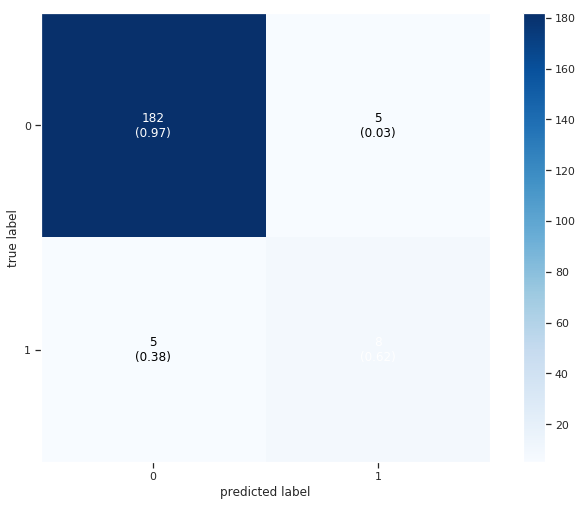

In [30]:
#Plot how well model predicts
confmatrix = confusion_matrix(y_test,y_pred_LogReg) 
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f639b0350f0>)

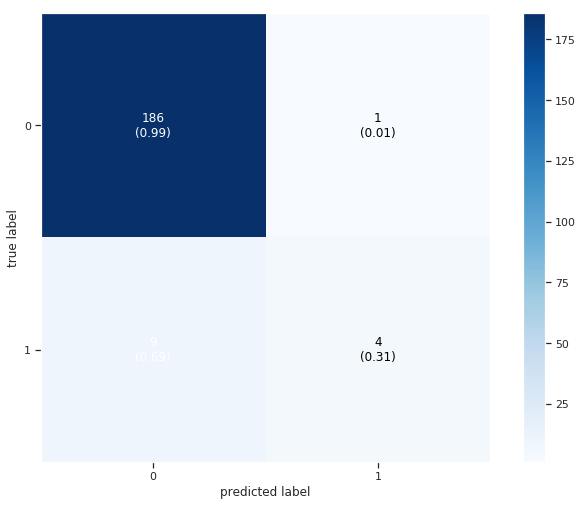

In [31]:
#Plot how well model predicts
confmatrix = confusion_matrix(y_test,y_pred_RForest) 
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f639af5df28>)

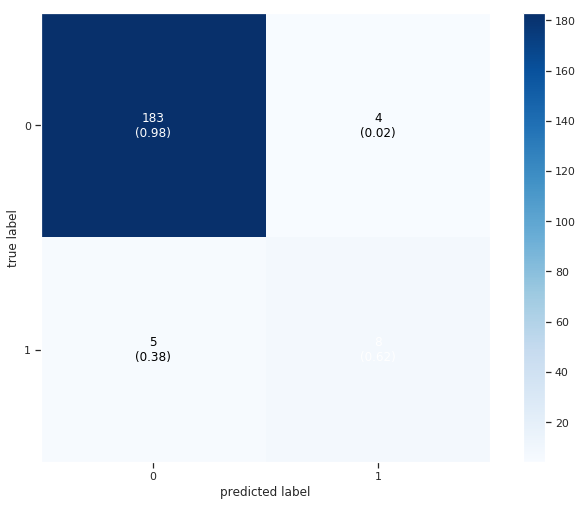

In [32]:
#Plot how well model predicts
confmatrix = confusion_matrix(y_test,y_pred_boost) 
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)